# FYP Data Analysis

## Python Setup

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [3]:
plt.style.use('_mpl-gallery')

## Sensitivity Check

In [9]:
def calculateSensitivity(a, b, s=0.3784):
  """
  Calculates the vibration acceleration sensitivity (ie. V/(m/s^2)) using formula s' = b/(a/s).

  Parameters:
  a: max of channel 1
  b: max of channel 2
  s: piezoelectric sensitivity (the piezoelectric vibration sensor we used has a sensitivity of 0.3784 V/(m/s^2))
  
  Returns:
  s': Sensitivity of our system (b/(a/s))

  """
  return b/(a/s)

In [10]:
def plot_data(time, voltage, title="Data Plot", color="#1f77b4"):
  """
  Plot voltage vs time data with matplotlib.

  Parameters:
  time: time data (s)
  voltage: voltage data (V)
  title: title of the plot
  color: color of the data points

  """
  plt.title(title)
  plt.xlabel("Time (s)")
  plt.ylabel("Voltage (V)")
  plt.plot(time, voltage, color)


In [11]:
# read experiment data from csv files

# 7
test_7_ch1 =  pd.read_csv('./experiment-data/SDS824X_HD_CSV_C1_7.csv', skiprows=11, usecols=['Second', 'Value'])
test_7_ch2 = pd.read_csv('./experiment-data/SDS824X_HD_CSV_C2_7.csv', skiprows=11, usecols=['Second', 'Value'])

# 8
test_8_ch1 =  pd.read_csv('./experiment-data/SDS824X_HD_CSV_C1_8.csv', skiprows=11, usecols=['Second', 'Value'])
test_8_ch2 = pd.read_csv('./experiment-data/SDS824X_HD_CSV_C2_8.csv', skiprows=11, usecols=['Second', 'Value'])

# 13
test_13_ch1 =  pd.read_csv('./experiment-data/SDS824X_HD_CSV_C1_13.csv', skiprows=11, usecols=['Second', 'Value'])
test_13_ch2 = pd.read_csv('./experiment-data/SDS824X_HD_CSV_C2_13.csv', skiprows=11, usecols=['Second', 'Value'])

# 14
test_14_ch1 =  pd.read_csv('./experiment-data/SDS824X_HD_CSV_C1_14.csv', skiprows=11, usecols=['Second', 'Value'])
test_14_ch2 = pd.read_csv('./experiment-data/SDS824X_HD_CSV_C2_14.csv', skiprows=11, usecols=['Second', 'Value'])

### Experiment 13

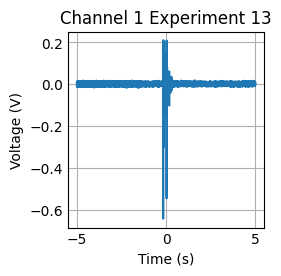

In [12]:
plot_data(test_13_ch1['Second'].tolist(), test_13_ch1['Value'].tolist(), title="Channel 1 Experiment 13")

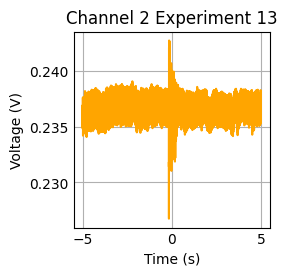

In [13]:
plot_data(test_13_ch2['Second'].tolist(), test_13_ch2['Value'].tolist(), title="Channel 2 Experiment 13", color="orange")

In [14]:
a = test_13_ch1['Value'].abs().max()
b = test_13_ch2['Value'].abs().max()
s = 0.3784
table_shake_sensitivity = b/(a/s)

print(f'Experiment 13: \n\na: {a}, b: {b}, s: {s}\nSensitivity: {table_shake_sensitivity}')

Experiment 13: 

a: 0.6427084, b: 0.24275, s: 0.3784
Sensitivity: 0.14292111321401743


### Experiment 7

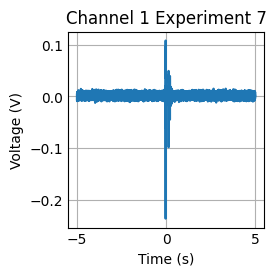

In [15]:
plot_data(test_7_ch1['Second'].tolist(), test_7_ch1['Value'].tolist(), title="Channel 1 Experiment 7")

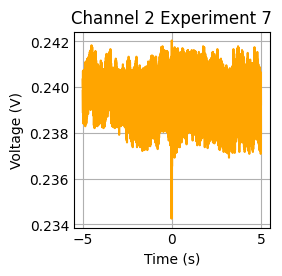

In [16]:
plot_data(test_7_ch2['Second'].tolist(), test_7_ch2['Value'].tolist(), title="Channel 2 Experiment 7", color="orange")

In [17]:
a = test_7_ch1['Value'].abs().max()
b = test_7_ch2['Value'].abs().max()
s = 0.3784
sensitivity = b/(a/s)

print(f'Experiment 7: \n\na: {a}, b: {b}, s: {s}\nSensitivity: {sensitivity}')

Experiment 7: 

a: 0.2366667, b: 0.2420416, s: 0.3784
Sensitivity: 0.38699378256425593


### Experiment 14

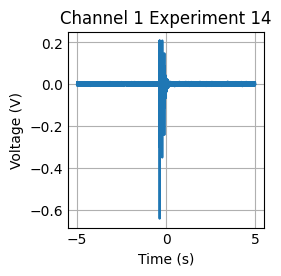

In [18]:
plot_data(test_14_ch1['Second'].tolist(), test_14_ch1['Value'].tolist(), title="Channel 1 Experiment 14")

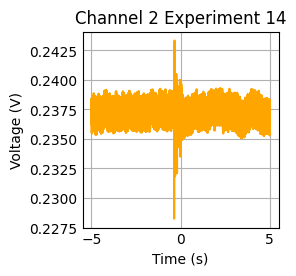

In [19]:
plot_data(test_14_ch2['Second'].tolist(), test_14_ch2['Value'].tolist(), title="Channel 2 Experiment 14", color="orange")

In [20]:
a = test_14_ch1['Value'].abs().max()
b = test_14_ch2['Value'].abs().max()
s = 0.3784
sensitivity = b/(a/s)

print(f'Experiment 14: \n\na: {a}, b: {b}, s: {s}\nSensitivity: {sensitivity}')

Experiment 14: 

a: 0.6427084, b: 0.2433333, s: 0.3784
Sensitivity: 0.14326453601664457


### Experiment 8

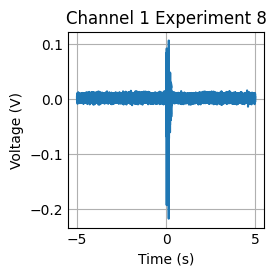

In [21]:
plot_data(test_8_ch1['Second'].tolist(), test_8_ch1['Value'].tolist(), title="Channel 1 Experiment 8")

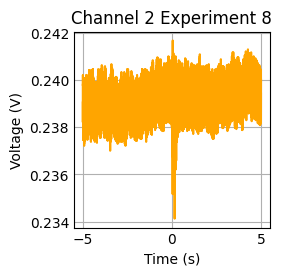

In [22]:
plot_data(test_8_ch2['Second'].tolist(), test_8_ch2['Value'].tolist(), title="Channel 2 Experiment 8", color="orange")

In [23]:
a = test_8_ch1['Value'].abs().max()
b = test_8_ch2['Value'].abs().max()
s = 0.3784
sensitivity = b/(a/s)

print(f'Experiment 8: \n\na: {a}, b: {b}, s: {s}\nSensitivity: {sensitivity}')

Experiment 8: 

a: 0.2175, b: 0.2416667, s: 0.3784
Sensitivity: 0.42044450243678166


## Linearity Check

In [24]:
# read channel 1 data from csv
ch1_10hz = pd.read_csv('./experiment-data/F0004CH1(10Hz).CSV', on_bad_lines='skip', usecols=['CH1 T', 'CH1 V'])
# read channel 2 data from csv
ch2_10hz = pd.read_csv('./experiment-data/F0004CH2(10Hz).CSV', on_bad_lines='skip', usecols=['CH2 T', 'CH2 V'])

In [25]:
# shift time so that all time is >0
ch2_10hz['CH2 T Shifted'] = ch2_10hz['CH2 T'] - ch2_10hz['CH2 T'].min() + 0.01
ch1_10hz['CH1 T Shifted'] = ch1_10hz['CH1 T'] - ch1_10hz['CH1 T'].min() + 0.01

### Oscilloscope Data

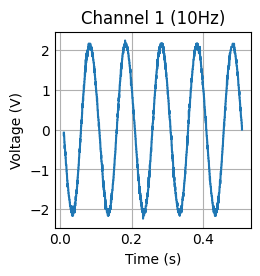

In [26]:
# 10hz
plt.title("Channel 1 (10Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.plot(ch1_10hz['CH1 T Shifted'].tolist(), ch1_10hz['CH1 V'].tolist())

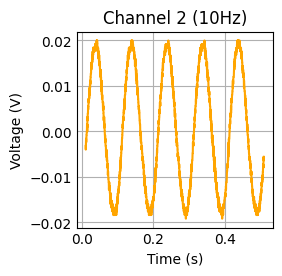

In [27]:
# 10hz
plt.title("Channel 2 (10Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.plot(ch2_10hz['CH2 T Shifted'].tolist(), ch2_10hz['CH2 V'].tolist(), color="orange")

### Take Half Period of Data for Analysis of Linearity

In [28]:
ch1_10hz_subset = ch1_10hz[102:387]
ch2_10hz_subset = ch2_10hz[378:663]

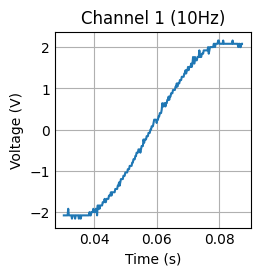

In [29]:
# 10hz
plt.title("Channel 1 (10Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.plot(ch1_10hz_subset['CH1 T Shifted'].tolist(), ch1_10hz_subset['CH1 V'].tolist())

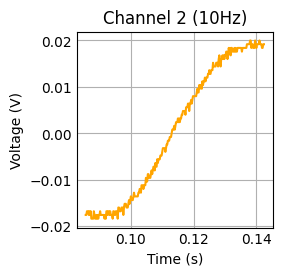

In [30]:
# 10hz
plt.title("Channel 2 (10Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.plot(ch2_10hz_subset['CH2 T Shifted'].tolist(), ch2_10hz_subset['CH2 V'].tolist(), color="orange")

In [31]:
# find linearity
linear_model = LinearRegression()

X, y = np.array(ch1_10hz_subset['CH1 V'].tolist()), np.array(ch2_10hz_subset['CH2 V'].tolist())
X = X.reshape(-1, 1)

linear_model.fit(X, y)

r_squared = round(linear_model.score(X, y),4)
print("R-squared:", r_squared)

slope = linear_model.coef_[0]
intercept = linear_model.intercept_

# Create the equation of the line
equation = f"y = {slope:.5f}x + {intercept:.5f}"
print("Equation of the line:", equation)

R-squared: 0.9972
Equation of the line: y = 0.00882x + 0.00022


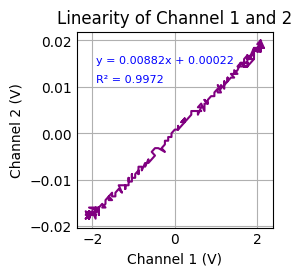

In [32]:
# 10hz
plt.title("Linearity of Channel 1 and 2")
plt.xlabel("Channel 1 (V)")
plt.ylabel("Channel 2 (V)")
plt.text(-1.9,0.011, f"R² = {r_squared}", fontsize=8, color='blue')
plt.text(-1.9,0.015, f"{equation}", fontsize=8, color='blue')
plt.plot(ch1_10hz_subset['CH1 V'].tolist(), ch2_10hz_subset['CH2 V'].tolist(), color="purple")

### Normalized Data

In [33]:
# normalize

# Create a MinMaxScaler object
scaler = MinMaxScaler()

ch1_10hz['CH1 V Normalized'] = scaler.fit_transform(ch1_10hz[['CH1 V']])
ch2_10hz['CH2 V Normalized'] = scaler.fit_transform(ch2_10hz[['CH2 V']])


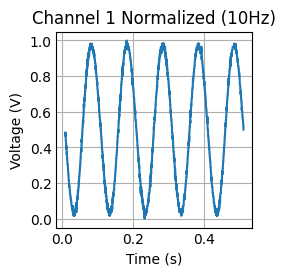

In [34]:
# 10hz
plt.title("Channel 1 Normalized (10Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.plot(ch1_10hz['CH1 T Shifted'].tolist(), ch1_10hz['CH1 V Normalized'].tolist())

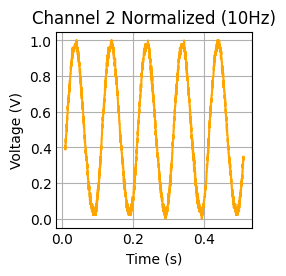

In [35]:
# 10 hz
plt.title("Channel 2 Normalized (10Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.plot(ch2_10hz['CH2 T Shifted'].tolist(), ch2_10hz['CH2 V Normalized'].tolist(), color='orange')

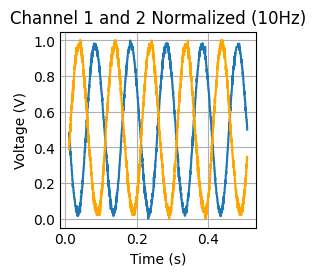

In [36]:
# 10 hz
plt.title("Channel 1 and 2 Normalized (10Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.plot(ch1_10hz['CH1 T Shifted'].tolist(), ch1_10hz['CH1 V Normalized'].tolist())
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.plot(ch2_10hz['CH2 T Shifted'].tolist(), ch2_10hz['CH2 V Normalized'].tolist(), color='orange')